# Four important things to know about Seattle homestay market

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import datasets
calendar = pd.read_csv("Data/calendar.csv")
listings = pd.read_csv("Data/listings.csv")
reviews = pd.read_csv("Data/reviews.csv")

# 1. Basic Data Exploratory
We will going to explore some basic information about the data in order to have better understanding

### 1.1 Calendar Dataset

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
print(f"Calendar dataset has {calendar.shape[0]} rows and {calendar.shape[1]} columns")

Calendar dataset has 1393570 rows and 4 columns


listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

Only price column having missing data



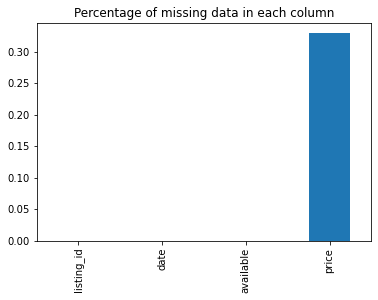

In [5]:
print(calendar.isnull().mean())
print("\nOnly price column having missing data\n")
calendar.isnull().mean().plot.bar(title = "Percentage of missing data in each column");

The coverage of this dataset is quite good, only price column contains missing values and percentage of missing values are 32%.

### 1.2 Listings dataset

In [6]:
#Let explore first few rows
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [7]:
print(f"Listings dataset has {listings.shape[0]} rows and {listings.shape[1]} columns")

Listings dataset has 3818 rows and 92 columns


In [8]:
#percentage of missing values in each column
listings.isnull().mean().sort_values(ascending=False).head(10)

license                  1.000000
square_feet              0.974594
monthly_price            0.602672
security_deposit         0.511262
weekly_price             0.473808
notes                    0.420639
neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
host_about               0.224987
dtype: float64

It can be seen that almost values in columns "license" and "square_feet" are Nan, we will drop these two columns.

In [9]:
#drop license and square_feet columns
listings = listings.drop(['license', 'square_feet'],axis=1)

In [10]:
listings.shape

(3818, 90)

### 1.3 Reviewings dataset

In [11]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
#percentage of missing values in each column
reviews.isnull().mean().sort_values(ascending=False)

comments         0.000212
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
dtype: float64

We do not have missing data issues in "reviews" dataset.

# 2. Data Cleaning
In this part, we will do some data cleaning work. Two major works are:
- Drop invariable columns in each dataset
- Some quantitative columns in string format and contain non-numeric characters, we need to convert these columns to numerics ones.

## 2.1 Drop invariable columns

In [13]:
def invar_column_drop(data,pct=0.99):
    """
    Inputs:
        data: input dataframe
        pct: the maximum threshold in percentage that one one values can appear in each column
    Output:
        Return a dataframe that already drop invariable columns
    """
    cols = data.columns
    for col in cols:
        if data[col].value_counts().max() >= pct*data.shape[0]:
            data = data.drop(col,axis=1)
    return data

In [14]:
#drop invariable columns in each dataset
calendar = invar_column_drop(calendar,pct=0.99)
listings = invar_column_drop(listings,pct=0.99)
reviews = invar_column_drop(reviews,pct=0.99)

In [15]:
#New shape for each dataframe
print("Updated calendar shape:", calendar.shape)
print("Updated listings shape:", listings.shape)
print("Updated reviews shape:", reviews.shape)

Updated calendar shape: (1393570, 4)
Updated listings shape: (3818, 76)
Updated reviews shape: (84849, 6)


### 2.2 Convert numeric string columns into numeric columns

In [16]:
def price_to_numeric(df,col):
    """
    INPUT:
        df: input dataframe
        col: column need to convert
    OUTPUT:
        return new dataset contained new quantitative variables
    """
    #remove commas
    df[col] = df[col].map(lambda x: str(x).replace(",","") if ("," in str(x)) else str(x))
    #remove dollar sign
    df[col] = df[col].map(lambda x: str(x)[1:] if ("$" in str(x)) else str(x))
    #convert to numeric
    df[col]= pd.to_numeric(df[col],errors='coerce')
    
    return df

In [17]:
#Apply convertion to calendar dataset
calendar = price_to_numeric(calendar,"price")

In [18]:
#apply convertion to listings dataset
price_convert_list = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee","extra_people"]
for col in price_convert_list:
    listings = price_to_numeric(listings,col)

# 3. Analysis

### 3.1 Picking right time for a trip

In [19]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


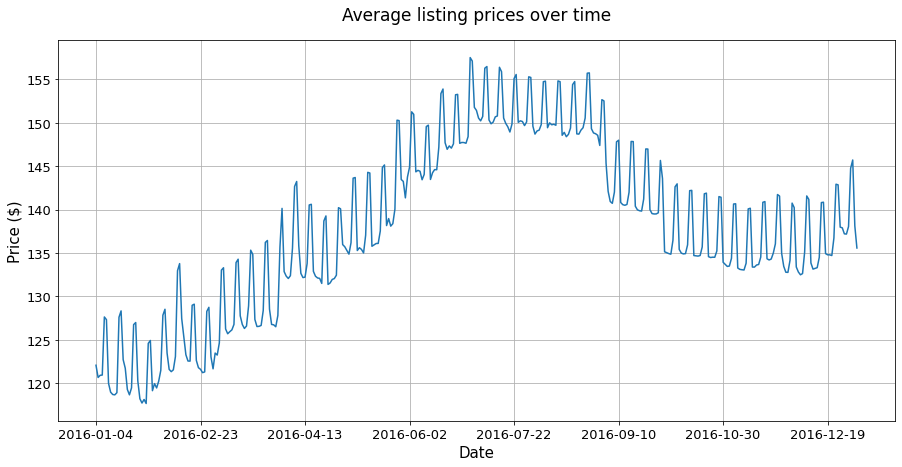

In [23]:
f1 = calendar.groupby('date').mean()['price'].plot.line(x = 'date',y='price',figsize = (15,7),title="Average listing prices over time",grid=True, fontsize=13);
f1.set_xlabel('Date',fontsize=15)
f1.set_ylabel('Price ($)',fontsize=15)
f1.set_title("Average listing prices over time",pad =20,fontsize=17);

The chart shows that renting price is lowest in January then go up gradually in following months. Price reached peak in Jun, July and August then slowly go down but still morderately high.

### 3.2 Top listing hosts in Seattle
There are various information about listing hosts which are available in Airbnb. We will base on different review_scores to recommend visitors top hosts in Seatle. Each host may have more than one listing, so in order to get reliable information we will summarize all information relating to each host and then based on this summary information to pick a list of recommened hosts.

In [24]:
#Summarize host information
listing_hosts = listings.groupby("host_id").mean()[["host_listings_count", "review_scores_rating", "review_scores_communication", "review_scores_location",\
                           "review_scores_cleanliness","review_scores_value","review_scores_checkin", "price"]]

In [25]:
#Picking host with high summary review_score
top_hosts = listing_hosts.query("host_listings_count >2 & review_scores_rating ==100 & review_scores_cleanliness==10 & review_scores_value==10 & review_scores_location==10").sort_values(by = "price")
top_hosts

,host_listings_count,review_scores_rating,review_scores_communication,review_scores_location,review_scores_cleanliness,review_scores_value,review_scores_checkin,price
host_id,,,,,,,,
26475960,3.0,100.0,10.0,10.0,10.0,10.0,10.0,45.000000
36993883,4.0,100.0,10.0,10.0,10.0,10.0,10.0,62.000000
807116,3.0,100.0,10.0,10.0,10.0,10.0,10.0,78.500000
7785901,3.0,100.0,10.0,10.0,10.0,10.0,10.0,111.333333
1608733,4.0,100.0,10.0,10.0,10.0,10.0,10.0,122.000000
36057637,4.0,100.0,10.0,10.0,10.0,10.0,10.0,164.500000
4160438,3.0,100.0,10.0,10.0,10.0,10.0,10.0,229.000000
164430,3.0,100.0,10.0,10.0,10.0,10.0,10.0,250.000000
919364,9.0,100.0,10.0,10.0,10.0,10.0,10.0,600.000000


In [48]:
#Getting host information
top_hosts_profile = listings[listings["host_id"].isin(top_hosts.index)][["host_id","host_name","street","review_scores_rating","property_type","review_scores_location",\
                                                     "review_scores_value","review_scores_cleanliness","price"]].dropna().sort_values(by="price")
top_hosts_profile.head(3)

,host_id,host_name,street,review_scores_rating,property_type,review_scores_location,review_scores_value,review_scores_cleanliness,price
2818,807116,Emily,"12th Avenue East, Seattle, WA 98102, United St...",100.00,Apartment,10.00,10.00,10.00,39.00
2553,26475960,David,"Northeast 55th Street, Seattle, WA 98105, Unit...",100.00,House,10.00,10.00,10.00,45.00
3748,36993883,Kate,"North 46th Street, Seattle, WA 98103, United S...",100.00,House,10.00,10.00,10.00,62.00


In [49]:
#Shorten host information in order to better visualize on web
top_hosts_profile_short = top_hosts_profile[["host_id","host_name","street","property_type","review_scores_rating","price"]]
top_hosts_profile_short.columns = ['Host_id', 'Host_name','Street','Property_type','Review_scores_rating','Price']
top_hosts_profile_short

,Host_id,Host_name,Street,Property_type,Review_scores_rating,Price
2818,807116,Emily,"12th Avenue East, Seattle, WA 98102, United St...",Apartment,100.00,39.00
2553,26475960,David,"Northeast 55th Street, Seattle, WA 98105, Unit...",House,100.00,45.00
3748,36993883,Kate,"North 46th Street, Seattle, WA 98103, United S...",House,100.00,62.00
1573,7785901,Andric And Drea,"8th Ave, Seattle, WA 98104, United States",Apartment,100.00,105.00
1619,7785901,Andric And Drea,"8th Avenue, Seattle, WA 98104, United States",Apartment,100.00,110.00
1600,7785901,Andric And Drea,"8th Ave, Seattle, WA 98104, United States",Apartment,100.00,119.00
3213,36057637,Martha,"6th Avenue North, Seattle, WA 98109, United St...",Townhouse,100.00,119.00
928,1608733,Ken & Layna,"19th Avenue, Seattle, WA 98122, United States",Townhouse,100.00,122.00
1254,4160438,Evan,"2nd Avenue, Seattle, WA 98121, United States",Apartment,100.00,229.00
1037,164430,Jill,"25th Ave S, Seattle, WA 98144, United States",House,100.00,250.00


In [62]:
#Styling table
df1 = top_hosts_profile_short.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')]),\
                                                      dict(selector = 'caption', props=[('font-size','150%'),('font-weight','bold'),('padding','20px')])])
df2 = df1.hide(axis=0).set_caption("Top Favourable Hosts").format(precision=2)
df2.set_properties(**{'text-align': 'center','border':'1px solid darkgreen'})


Host_id,Host_name,Street,Property_type,Review_scores_rating,Price
807116,Emily,"12th Avenue East, Seattle, WA 98102, United States",Apartment,100.00,39.00
26475960,David,"Northeast 55th Street, Seattle, WA 98105, United States",House,100.00,45.00
36993883,Kate,"North 46th Street, Seattle, WA 98103, United States",House,100.00,62.00
7785901,Andric And Drea,"8th Ave, Seattle, WA 98104, United States",Apartment,100.00,105.00
7785901,Andric And Drea,"8th Avenue, Seattle, WA 98104, United States",Apartment,100.00,110.00
7785901,Andric And Drea,"8th Ave, Seattle, WA 98104, United States",Apartment,100.00,119.00
36057637,Martha,"6th Avenue North, Seattle, WA 98109, United States",Townhouse,100.00,119.00
1608733,Ken & Layna,"19th Avenue, Seattle, WA 98122, United States",Townhouse,100.00,122.00
4160438,Evan,"2nd Avenue, Seattle, WA 98121, United States",Apartment,100.00,229.00
164430,Jill,"25th Ave S, Seattle, WA 98144, United States",House,100.00,250.00


### 3.3 Common property types
We only consider property type with more than 30 listings to ensure that the results are generalized.

In [51]:
#Select property type with more than 30 listings
property_list = listings.groupby("property_type").count()['id'].loc[lambda x:x>30].keys()
listings_property = listings[listings['property_type'].isin(property_list)]

In [52]:
#Average price of each property type
s1 = listings_property.groupby("property_type").mean()['price'].to_frame()
s1.columns = ['Average Price']
#Number of properties for type
s2 = listings_property.groupby("property_type").count()['price'].to_frame()
s2.columns = ['Number of properties']
#combine two series
s= pd.concat([s1,s2],axis=1)
s

,Average Price,Number of properties
property_type,,
Apartment,122.93,1708
Bed & Breakfast,112.05,37
Condominium,151.11,91
House,132.35,1733
Loft,135.70,40
Townhouse,129.46,118


In [55]:
listings.property_type.unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

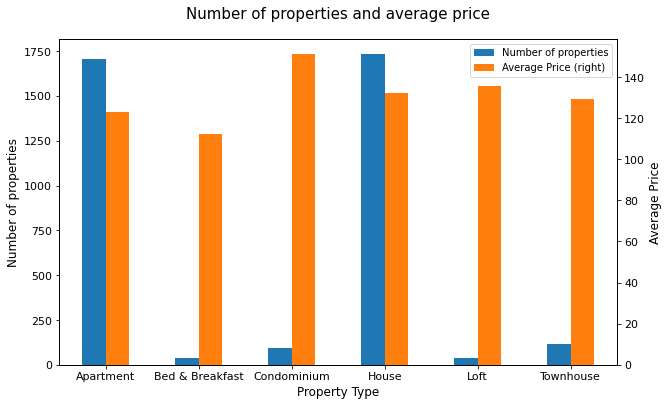

In [57]:
q3 = s.plot(kind = 'bar',y=['Number of properties','Average Price'],secondary_y = ['Average Price'],rot=0,figsize=(10,6),fontsize=11)
q3.set_title("Number of properties and average price",pad =20,fontsize=15);
q3.set_xlabel("Property Type", fontsize=12);
q3.set_ylabel('Number of properties', fontsize=12);
ax2 = q3.twinx()
ax2.set(yticklabels=[])
ax2.tick_params(right=False)
ax2.set_ylabel("Average Price",labelpad=25,fontsize=12);

In [54]:
#Take a look at review_scores for each category
listings_property.groupby("property_type").mean()[["price","review_scores_rating","review_scores_cleanliness",\
                                                   "review_scores_communication","review_scores_location","review_scores_value"]]

,price,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
property_type,,,,,,
Apartment,122.93,93.98,9.53,9.79,9.68,9.36
Bed & Breakfast,112.05,95.73,9.62,9.88,9.54,9.42
Condominium,151.11,95.32,9.65,9.86,9.85,9.47
House,132.35,94.83,9.56,9.82,9.53,9.52
Loft,135.70,95.45,9.61,9.85,9.64,9.48
Townhouse,129.46,96.62,9.75,9.90,9.59,9.71


### 3.4 Customers gave high rating for active response hosts
We will look two important features: "host_response_time" and "host_response_rate" to see if customers likely to go with listing hosts have active responses.

In [277]:
#Review_scores on each group of response_time
listings.groupby("host_response_time").mean()[["price","security_deposit","cleaning_fee","review_scores_rating","review_scores_cleanliness","review_scores_checkin",\
                                                   "number_of_reviews","review_scores_location","review_scores_value"]]

,price,security_deposit,cleaning_fee,review_scores_rating,review_scores_cleanliness,review_scores_checkin,number_of_reviews,review_scores_location,review_scores_value
host_response_time,,,,,,,,,
a few days or more,129.157895,445.833333,62.727273,87.793103,8.551724,9.413793,11.657895,9.448276,8.862069
within a day,132.819095,291.904545,73.649758,94.264831,9.513800,9.726115,13.144054,9.588983,9.387712
within a few hours,133.824380,280.574297,63.932773,93.812425,9.508373,9.759904,24.845041,9.558223,9.379352
within an hour,116.358747,272.715210,56.151014,95.143984,9.635766,9.817763,28.882979,9.653289,9.526316


The hosts with faster responses to guests will likely get more favors from customers. We will use another method to reaffirm above info

In [70]:
def encode_response_time(x):
    """
    We encode order categorical variable x into numeric type,
    the faster response, the higher number is assigned.
    """
    if x == "within an hour":
        return 4
    elif x=="within a few hours":
        return 3
    elif x == "within a day":
        return 2
    elif x=="a few days or more":
        return 1
    else:
        return np.nan
    

In [ ]:
#Apply encode function to response_time_encoding feature
listings["response_time_encoding"] = listings.host_response_time.map(lambda x: encode_response_time(x))
# We also convert response rate into numeric variable
listings["host_response_rate"] = pd.to_numeric(listings.host_response_rate.str[:-1],errors='coerce')

In [59]:
#Look at correlation matrix
listings[["review_scores_rating","review_scores_cleanliness","review_scores_location","review_scores_value","response_time_encoding"]].corr()

,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,response_time_encoding
review_scores_rating,1.000000,0.642882,0.368423,0.696534,0.098588
review_scores_cleanliness,0.642882,1.000000,0.277834,0.524354,0.108059
review_scores_location,0.368423,0.277834,1.000000,0.368252,0.058672
review_scores_value,0.696534,0.524354,0.368252,1.000000,0.104967
response_time_encoding,0.098588,0.108059,0.058672,0.104967,1.000000


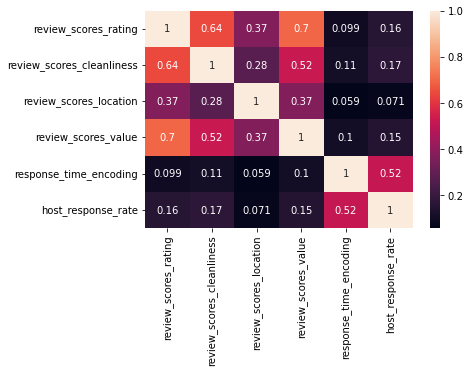

In [61]:
sns.heatmap(listings[["review_scores_rating","review_scores_cleanliness","review_scores_location","review_scores_value","response_time_encoding","host_response_rate"]].corr(),annot=True);